In [ ]:
!pip install beautifulsoup4 requests pandas

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://us.youtubers.me/somalia/all/top-1000-most-subscribed-youtube-channels-dentro-somalia'
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

data = []
table = soup.find('table', class_='top-charts')  # Use the correct class name
if table:
    for row in table.find_all('tr')[1:]:  # Start from the second row to skip headers
        columns = row.find_all('td')
        if len(columns) >= 6:  # Ensure we have enough columns
            rank = columns[0].text.strip()
            youtuber = columns[1].text.strip()
            subscribers = columns[2].text.strip()
            video_views = columns[3].text.strip()
            category = columns[5].text.strip()  # Adjust index for category
            data.append([rank, youtuber, subscribers, video_views, category])

    df = pd.DataFrame(data, columns=['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category'])
    print(df)
else:
    print("Table not found. Double-check the website structure and class names.")

   Rank                         Youtuber Subscribers  Video Views  \
0     1                        Garaad TV     527,000  206,359,166   
1     2           idaacadda buuloxuubeey     522,000   61,298,156   
2     3                       HANOOLAATO     480,000   69,472,383   
3     4  Sheekh Mustafe Official Channel     400,000   34,354,450   
4     5            YAASIIN BALBALAADHSHE     310,000   96,853,720   
..  ...                              ...         ...          ...   
66   67                      Asma Studio           0      717,674   
67   68              SOMALI NEWS LIVE HD           0   19,214,695   
68   69              Dur-dur Media Group           0   87,105,542   
69   70                     A.A.A KHAAJA           0      283,750   
70   71                            MO EG           0    6,293,083   

                 Category  
0          People & Blogs  
1          People & Blogs  
2   Nonprofits & Activism  
3               Education  
4           Entertainment  
.. 

In [41]:
df = pd.read_csv('/content/Top 100 somalia_youtube_channels.csv')
print(df)


     rank                         Youtuber subscribers  video views  \
0       1                        Garaad TV     527,000  206,359,166   
1       2           idaacadda buuloxuubeey     522,000   61,298,156   
2       3                       HANOOLAATO     480,000   69,472,383   
3       4  Sheekh Mustafe Official Channel     400,000   34,354,450   
4       5            YAASIIN BALBALAADHSHE     310,000   96,853,720   
..    ...                              ...         ...          ...   
350    67                      Asma Studio           0      717,674   
351    68              SOMALI NEWS LIVE HD           0   19,214,695   
352    69              Dur-dur Media Group           0   87,105,542   
353    70                     A.A.A KHAAJA           0      283,750   
354    71                            MO EG           0    6,293,083   

    video count               category  started  
0         5,132         People & Blogs     2013  
1         1,116         People & Blogs     2013

In [47]:
import pandas as pd
import os

# Load the dataset
file_path = 'Top 100 somalia_youtube_channels.csv'
df = pd.read_csv('Top 100 somalia_youtube_channels.csv')

# Display the first few rows of the dataset
print("Original Data:")
print(df.head())

# Get basic information about the dataset
print("\nDataset Info:")
df.info()

# Get summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'subscribers', 'video views', and 'video count' to integers
df['subscribers'] = df['subscribers'].str.replace(',', '').astype(int)
df['video views'] = df['video views'].str.replace(',', '').astype(int)
df['video count'] = df['video count'].str.replace(',', '').astype(int)

# Handle missing values in 'category' by filling them with 'Unknown'
df['category'] = df['category'].fillna('Unknown')

# Remove duplicate rows
df = df.drop_duplicates()

# Strip leading/trailing whitespace from string columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/mnt/data/cleaned_youtube_channels.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(cleaned_file_path), exist_ok=True)

df.to_csv(cleaned_file_path, index=False)

# Display the first few rows of the cleaned dataset
print("\nCleaned Data:")
print(df.head())

# Get basic information about the cleaned dataset
print("\nCleaned Dataset Info:")
df.info()

# Get summary statistics of the cleaned dataset
print("\nCleaned Summary Statistics:")
print(df.describe())

# Check for missing values in the cleaned dataset
print("\nCleaned Missing Values:")
print(df.isnull().sum())

Original Data:
   rank                         Youtuber subscribers  video views video count  \
0     1                        Garaad TV     527,000  206,359,166       5,132   
1     2           idaacadda buuloxuubeey     522,000   61,298,156       1,116   
2     3                       HANOOLAATO     480,000   69,472,383       1,989   
3     4  Sheekh Mustafe Official Channel     400,000   34,354,450         291   
4     5            YAASIIN BALBALAADHSHE     310,000   96,853,720       7,326   

                category  started  
0         People & Blogs     2013  
1         People & Blogs     2013  
2  Nonprofits & Activism     2014  
3              Education     2016  
4          Entertainment     2014  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         355 non-null    int64 
 1   Youtuber     355 non-null    object

<ipython-input-47-eddffefb7a67>:36: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



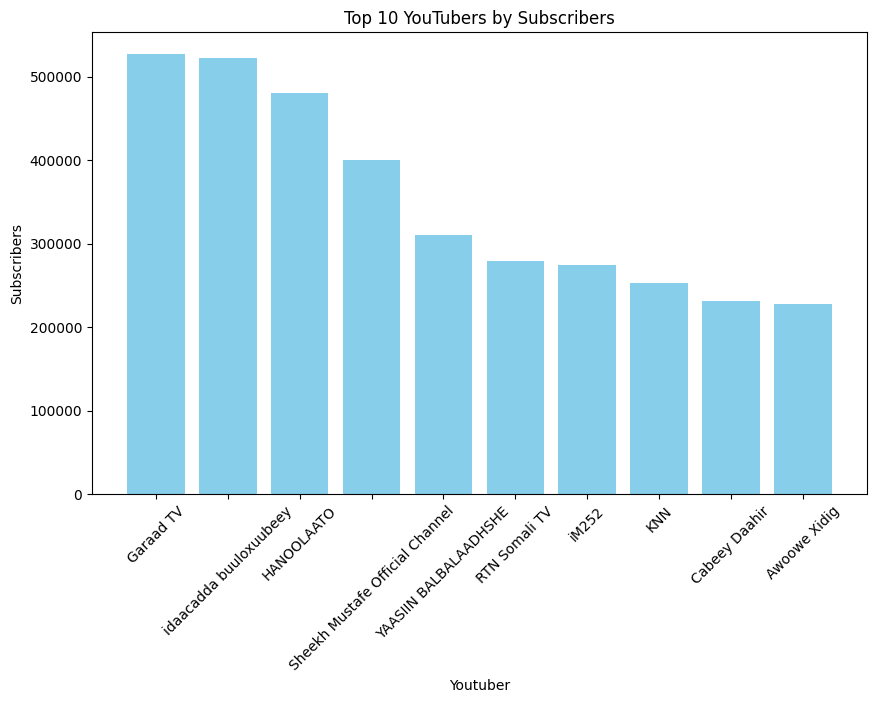

In [48]:
import matplotlib.pyplot as plt

# Get top 10 YouTubers by subscribers
top_youtubers = df.nlargest(10, 'subscribers')

plt.figure(figsize=(10, 6))
plt.bar(top_youtubers['Youtuber'], top_youtubers['subscribers'], color='skyblue')
plt.xlabel('Youtuber')
plt.ylabel('Subscribers')
plt.title('Top 10 YouTubers by Subscribers')
plt.xticks(rotation=45)
plt.show()

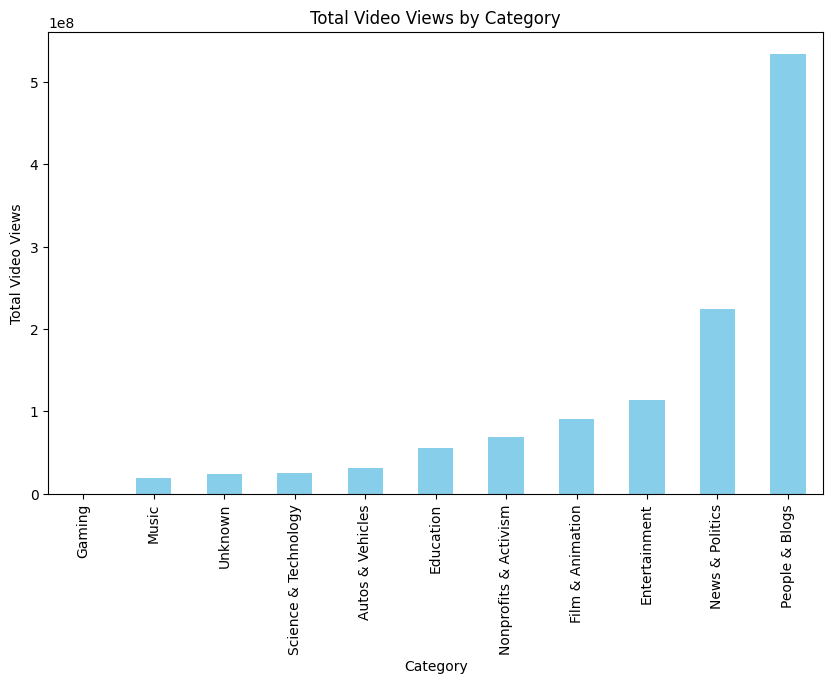

In [49]:
category_views = df.groupby('category')['video views'].sum().sort_values()

plt.figure(figsize=(10, 6))
category_views.plot(kind='bar', stacked=True, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Video Views')
plt.title('Total Video Views by Category')
plt.show()


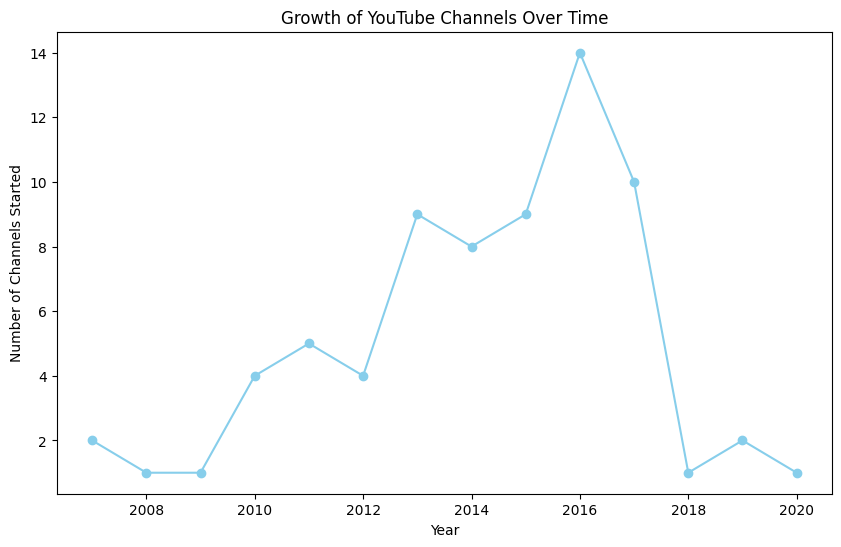

In [50]:
channels_per_year = df['started'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(channels_per_year.index, channels_per_year.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Channels Started')
plt.title('Growth of YouTube Channels Over Time')
plt.show()

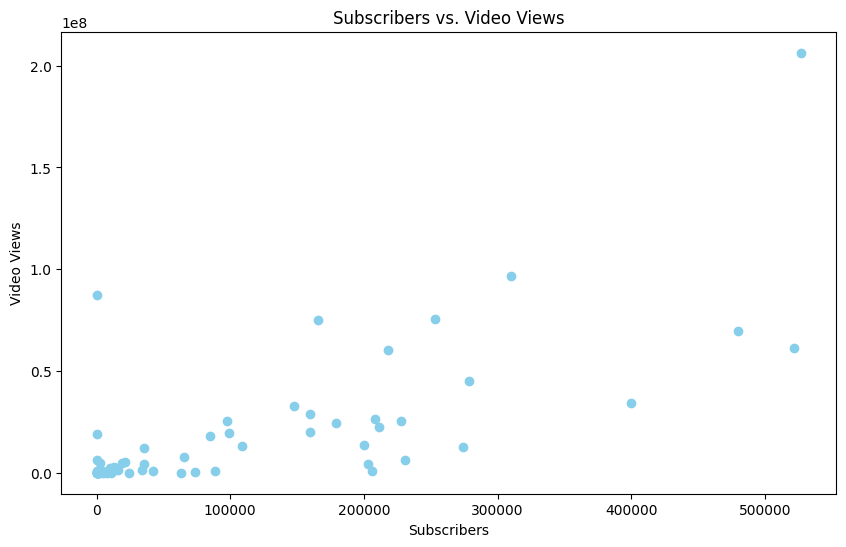

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['subscribers'], df['video views'], color='skyblue')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.title('Subscribers vs. Video Views')
plt.show()

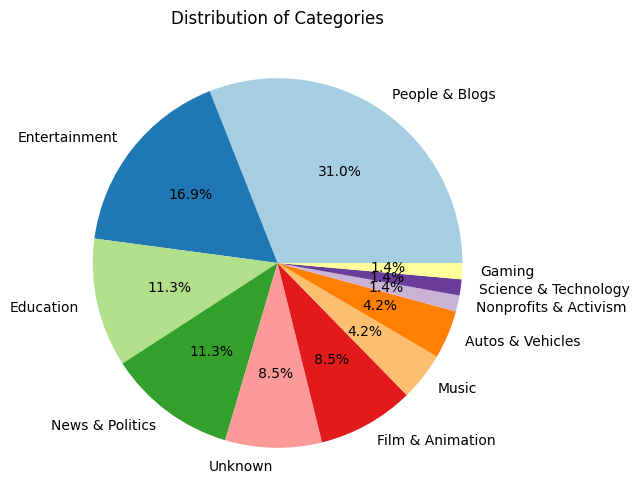

In [52]:
category_counts = df['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.ylabel('')
plt.title('Distribution of Categories')
plt.show()

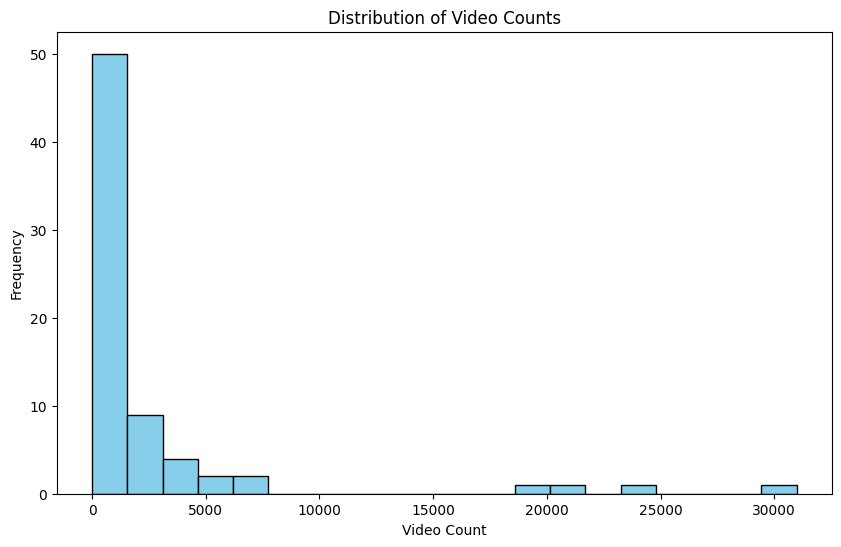

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df['video count'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Video Count')
plt.ylabel('Frequency')
plt.title('Distribution of Video Counts')
plt.show()

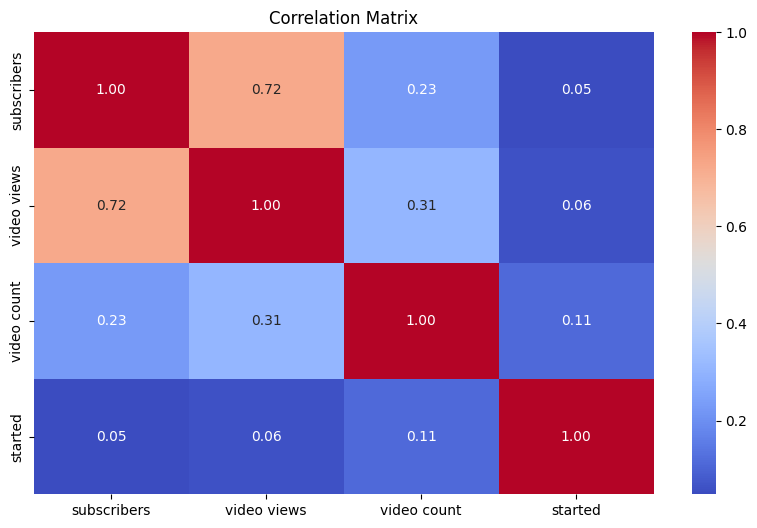

In [54]:
import seaborn as sns

correlation_matrix = df[['subscribers', 'video views', 'video count', 'started']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [55]:
import plotly.express as px

fig = px.treemap(df, path=['category'], values='subscribers', title='Subscribers by Category')
fig.show()